In [1]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats


In [2]:
#Define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#Loading data
data_frame = pd.read_csv('./iris.data.txt', header=None, names=names)

#Show data
data_frame

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#How to extract individual columns of the iris dataset
sepal_length = np.array(data_frame['sepal_length'])
sepal_width = np.array(data_frame['sepal_width'])
petal_length = np.array(data_frame['petal_length'])
petal_width = np.array(data_frame['petal_width'])

#Process the class column to have an encoding as a new column
#First change class type to be category
data_frame["class"] = data_frame["class"].astype('category')
#Create the encoding column using the class column
data_frame["class_encoding"] = data_frame["class"].cat.codes

#How to extract class encoding
class_label = np.array(data_frame['class'])
class_encoding = np.array(data_frame['class_encoding'])

#Show first 5 rows of data_frame
data_frame.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_encoding
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


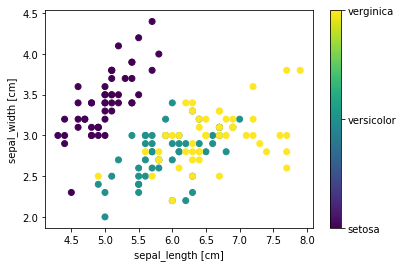

In [4]:
#Create plot labels
plot_labels = ['setosa', 'versicolor', 'verginica']

#Format colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: plot_labels[int(i)])

#Plot sepal_length and sepal_width
plt.scatter(sepal_length, sepal_width, c=class_encoding)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(names[0] + ' [cm]')
plt.ylabel(names[1] + ' [cm]')


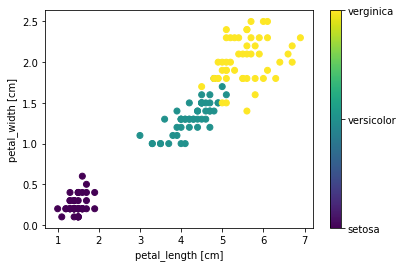

In [5]:
#Plot petal_length and petal_width
plt.scatter(petal_length, petal_width, c=class_encoding)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(names[2] + ' [cm]')
plt.ylabel(names[3] + ' [cm]')

### Exercise 1

#### Plotting data
Using the previous block of code, plot the sepal_width (y-axis) vs the petal width (x-axis). Make sure to update the x-axis and y-axis labels in the plot as well. Time: 5 minutes

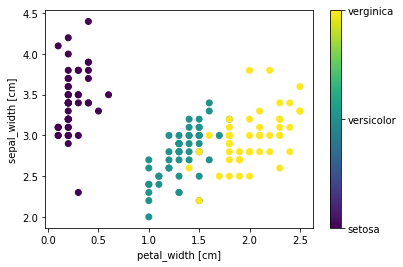

In [6]:
#Plot petal_length and petal_width
plt.scatter(petal_width, sepal_width, c=class_encoding)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(names[3] + ' [cm]')
plt.ylabel(names[1] + ' [cm]')

### A Typical Machine Learning Flowchart
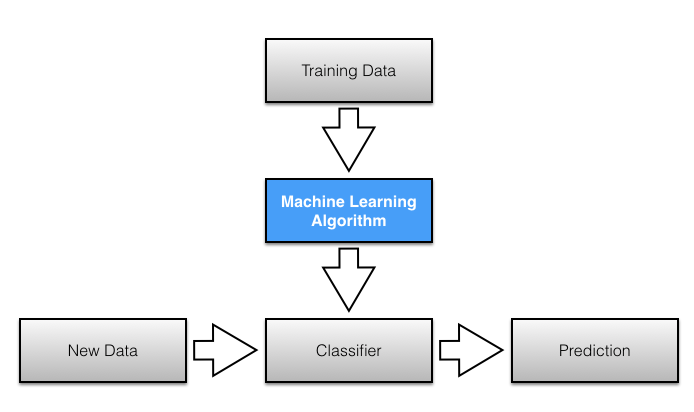

In [13]:
#Functions for KNN

def predict(X_train, Y_train, X_test, k):
    #Create list for distances and k_closest
    distances = []
    k_closest = []

    for i in range(len(X_train)):
        #First we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        #Add it to list of distances
        distances.append([distance, i])
    
    #Sort the list
    distances = sorted(distances)

    #Make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        k_closest.append(Y_train[index])
    
    #Return most common out of k_closest
    prediction, _ = stats.mode(k_closest)
    return prediction


def kNearestNeighbor(X_train, Y_train, X_test, k):
    #Stores predictions 
    predictions = []

    #Loop over all observations
    for i in range(len(X_test)):
        ith_prediction = predict(X_train, Y_train, X_test[i, :], k)
        predictions.append(ith_prediction)
        
    #Remove extra dimension
    predictions = np.squeeze(predictions, axis=2)
    true_labels = Y_test[:,0]
    
    return predictions, true_labels

def addNumbers(number1, number2):
    result = number1 + number2
    myString = 'hi'
    return result, myString

In [15]:
num1 = 3
num2 = 5

result, theString = addNumbers(num1, num2)
print(result)
print(theString)



8
hi


#### The code below is what you will change to modify your algorithm:

In [16]:
#_________________________Set up data_________________________________
#Example of using all the features from the data
iris_data_X = np.array(data_frame[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

#Example of using one feature from the data
#iris_data_X = np.array(data_frame[['sepal_length']])

iris_data_Y = np.array(data_frame[['class_encoding']])

#Save 33% of the data as testing and the rest for training
X_train, X_test, Y_train, Y_test = train_test_split(iris_data_X, iris_data_Y, test_size = 0.33, random_state = 20)


#____________________________Run KNN_________________________________
#Compute KNN and obtain predictions
k = 1
predictions, true_labels = kNearestNeighbor(X_train, Y_train, X_test, k)

#Show our predictions and labels
print('Predictions:\n', predictions)
print('\nTrue Labels:\n', true_labels)

#Confusion matrix
print('\nConfusion Matrix:\n', confusion_matrix(true_labels, predictions))

accuracy = accuracy_score(true_labels, predictions)
print('\nThe accuracy of your classifier is: ', accuracy*100, '%')

Predictions:
 [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 2 1 1 0 2 1 1 1 0 0 0 1 1
 0 1 2 1 2 0 1 1 0 0 0 2 0]

True Labels:
 [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2 1 1 0 0 0 2 1
 0 1 2 1 2 0 1 1 0 0 0 2 0]

Confusion Matrix:
 [[17  0  0]
 [ 0 17  1]
 [ 0  3 12]]

The accuracy of your classifier is:  92.0 %


### Confusion Matrix

A Confusion Matrix is a tool to help you understand how your algorithm is performing. An algorithm with perfect results will have all of it's values in the confusion matrix be along the diagonal.

The rows are the actual values from the labeled data and the columns are what the algorithm predicted.

In this confusion matrix there were 165 datapoints (patients) where an algorithm tried to determine if 165 patients have a disease or not. 

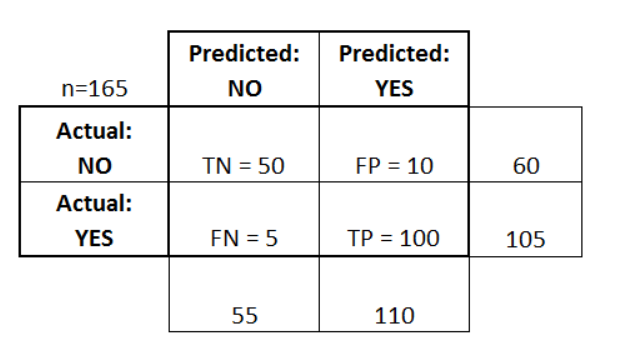

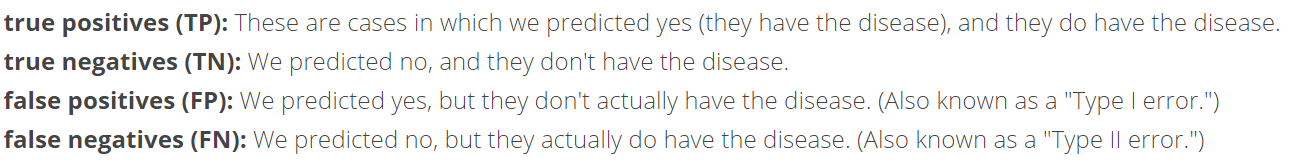

Accuracy can be calculated using the values from a confusion matrix

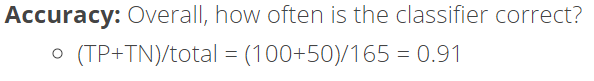

### Exercise 2

#### Confusion Matrix

Given a numpy array of predictions: [0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 1]

and a numpy array of true labels:   [0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1]

Use a pen and paper to write out what the confusion matrix would look like. Then code the confusion matrix in python using the provied package and the sample code.

The class encodings are:

0 = setosa

1 = versicolor

2 = verginica

Time: 15 minutes

### Exercise 3

#### Getting familiar with KNN code 1

With your team, change k in the provided code to obtain the best accuracy. If you have questions about the code ask a TA. Now is the time to ask questions to understand how to use the code. Once you are satisfied with your results, please provide them to a TA. Time: 10 minutes

### Exercise 4

#### Getting familiar with KNN code 2

With your team, change the iris_data_x data to have only one feature. Change the feature and k in the provided code to obtain the best accuracy. If you have questions about the code ask a TA. Once you are satisfied with your results, please provide them to a TA. Time: 20 minutes